In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [2]:
df=pd.read_csv('dataset/income.csv')

In [3]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


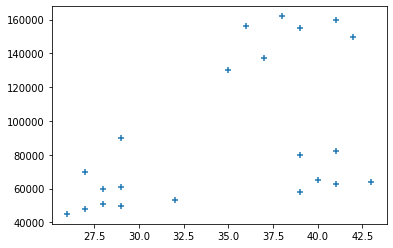

In [4]:
plt.scatter(df['Age'],df['Income($)'],marker='+')

In [5]:
km= KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
y_predicted=km.fit_predict(df[['Age','Income($)']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [7]:
df['cluster']=y_predicted

In [8]:
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


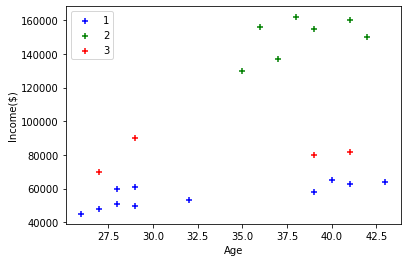

In [9]:
df0=df[df['cluster']==0]
df1=df[df['cluster']==1]
df2=df[df['cluster']==2]
Income1=plt.scatter(df0['Age'],df0['Income($)'],marker='+',color='blue')
Income2=plt.scatter(df1['Age'],df1['Income($)'],marker='+',color='green')
Income3=plt.scatter(df2['Age'],df2['Income($)'],marker='+',color='red')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend([Income1,Income2,Income3],['1','2','3'])

In [10]:
scaler =MinMaxScaler()
scaler2=MinMaxScaler()

In [11]:
scaler.fit(df[['Income($)']])
df['Income($)']=scaler.transform(df[['Income($)']])

In [12]:
df.head()

,Name,Age,Income($),cluster
0,Rob,27,0.213675,2
1,Michael,29,0.384615,2
2,Mohan,29,0.136752,0
3,Ismail,28,0.128205,0
4,Kory,42,0.897436,1


In [13]:
scaler2.fit(df[['Age']])
df['Age']=scaler2.transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [14]:
y_predicted=km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [15]:
df['cluster']=y_predicted

In [16]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


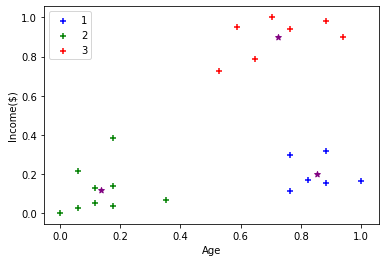

In [17]:
df0=df[df['cluster']==0]
df1=df[df['cluster']==1]
df2=df[df['cluster']==2]
Income1=plt.scatter(df0['Age'],df0['Income($)'],marker='+',color='blue')
Income2=plt.scatter(df1['Age'],df1['Income($)'],marker='+',color='green')
Income3=plt.scatter(df2['Age'],df2['Income($)'],marker='+',color='red')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend([Income1,Income2,Income3],['1','2','3'])

In [18]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

In [19]:
# Elbow Method
k_range = range(1,10)
sse=[]
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

In [20]:
sse

[5.43401151198818,
 2.091136388699078,
 0.4750783498553096,
 0.3491047094419565,
 0.2664030124668416,
 0.22918935829650655,
 0.16858512236029757,
 0.13265419827245162,
 0.10188787724979426]

Text(0, 0.5, 'Sum of squared error')

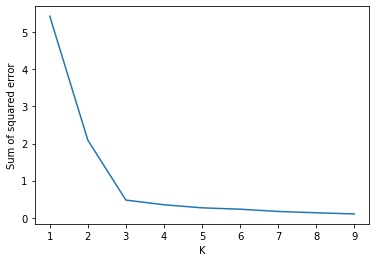

In [21]:
plt.plot(k_range,sse)
plt.xlabel('K')
plt.ylabel('Sum of squared error')